In [1]:
# Import modules
# import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

pd.set_option('display.max_columns', 100)
sns.set()
sns.set_style("white")

Read data from clean dataset

In [2]:
df = pd.read_csv('../data/processed/wound_outcomes_v1.csv')

In [3]:
print(df.head())

   Off pump  КШ тип  Соч  ВГА  ИСХОД
0         0   1   E    0    1      0
1         1   1   E    0    1      0
2         0   1   E    1    1      0
3         0   1   E    1    1      0
4         0   1   E    0    1      0


In [4]:
df['ИСХОД'].value_counts()

0    1882
1      65
2      15
Name: ИСХОД, dtype: int64

Calculate the correlation/strength-of-association of features Cramer's V 

read more: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

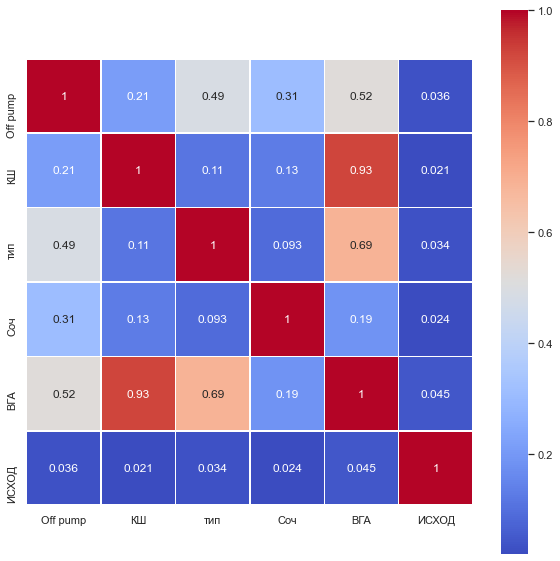

In [5]:
corr=associations(df, nominal_columns='all', mark_columns=False, theil_u=False, plot=False, return_results=True)

plt.figure(figsize=(10,10))
plt.title = 'Correlation of features'
sns.heatmap(corr,annot=True,linewidth = 0.5, cmap='coolwarm', square=True)

Do some feature engineering

In [6]:
df = pd.get_dummies(df, columns=['тип', 'ВГА', 'ИСХОД'], drop_first=True)

In [8]:
# 'ИСХОД' = ИСХОД_1 OR ИСХОД_2
df['ИСХОД'] = df['ИСХОД_1'] + df ['ИСХОД_2']

In [9]:
df.head()

,Off pump,КШ,Соч,тип_П,тип_Т,ВГА_1,ВГА_2,ИСХОД_1,ИСХОД_2,ИСХОД
0,0,1,0,0,0,1,0,0,0,0
1,1,1,0,0,0,1,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0
3,0,1,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0


Cramer's V for newly created features

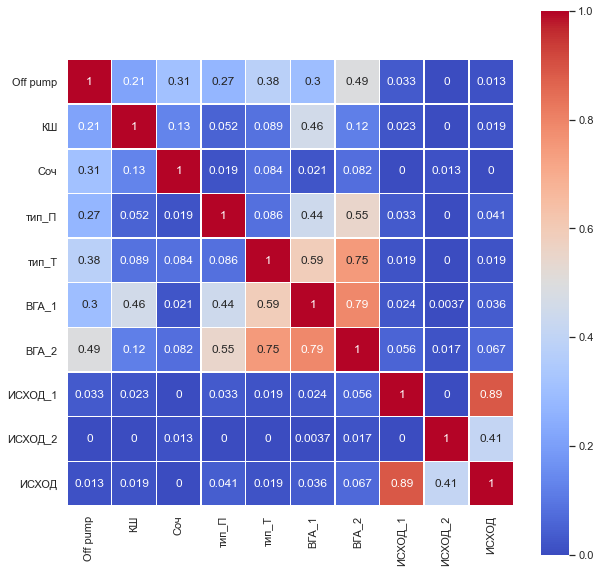

In [10]:
corr=associations(df, nominal_columns='all', mark_columns=False, theil_u=False, plot=False, return_results=True)

plt.figure(figsize=(10,10))
plt.title = 'Correlation of features'
sns.heatmap(corr,annot=True,linewidth = 0.5, cmap='coolwarm', square=True)

We can look at our variables as continuous and calculate classic Pearson's R

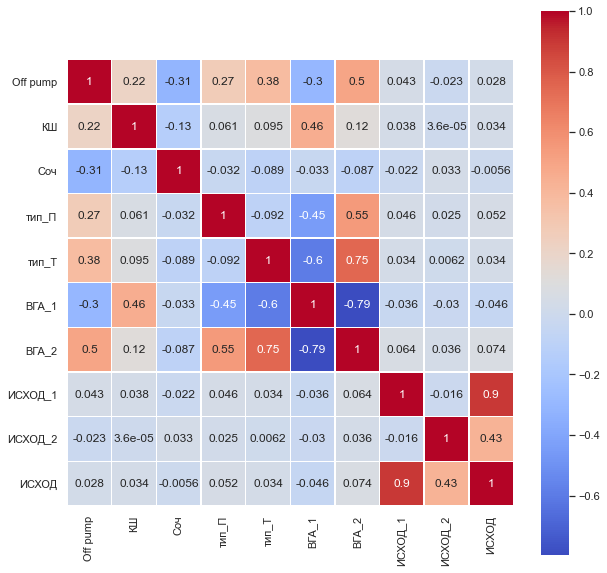

In [11]:
corr=associations(df, nominal_columns='auto', mark_columns=False, theil_u=False, plot=False, return_results=True)

plt.figure(figsize=(10,10))
plt.title = 'Correlation of features'
sns.heatmap(corr,annot=True,linewidth = 0.5, cmap='coolwarm', square=True)